# C. High-speed data

In [1]:
import os
import numpy as np

### SELECT DATA
from config import MRI8_NVF4_10mm_0p0mmVVVV as cfg

os.chdir('../')
from lib.methods import *

fig = Figure_BCVVFC({
                    'font.family':'Times New Roman',
                    'mathtext.fontset':'stix',
                    'font.size':30,
                    })

In [2]:
os.chdir('../')

## Load data

In [3]:
csv_data_list, video_data_list, video_t_data_list = LoadCSVandVIDEOS(
                                                                    csv_path=cfg.CSV_FILE_DIR+cfg.DATA_NAME+'.csv', 
                                                                    data_name_list=['t', 'mic', 'flow'], 
                                                                    sample_span=(160000, 170000), 
                                                                    videos_path_list=[
                                                                                    cfg.VIDEO_FILE_DIR+'VF/'+cfg.DATA_NAME+'.avi',
                                                                                    cfg.VIDEO_FILE_DIR+'FVF/'+cfg.DATA_NAME+'.avi',
                                                                                    ]
                                                                    )
video_vf_data = video_data_list[0]
video_fvf_data = video_data_list[1]

Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI8_NVF4_10mm_0p0mmVVVV.csv
data list | t, mic, flow
Loading video data
file path | ./data/VF_FVF_DATASETS/VIDEO/VF/MRI8_NVF4_10mm_0p0mmVVVV.avi


Loading video data
file path | ./data/VF_FVF_DATASETS/VIDEO/FVF/MRI8_NVF4_10mm_0p0mmVVVV.avi


## Preprocess

In [4]:
pp = PreProcessing(
                data=csv_data_list[1], ### mic data
                t_data=csv_data_list[0], ### mic t data
                video_data_list=video_data_list, 
                video_t_data_list=video_t_data_list
                )
pp.filter()
pp.linescanning_video(params_list = [cfg.LINE_SCANNING_PARAMS_VF, cfg.LINE_SCANNING_PARAMS_FVF])

video_vf_kymogram_data =  pp.video_data_list[0]
video_fvf_kymogram_data =  pp.video_data_list[1]
video_vf_t_data = pp.video_t_data_list[0]
video_fvf_t_data = pp.video_t_data_list[1]

In [5]:
video_vf_data.shape

(7999, 112, 90)

## Figure

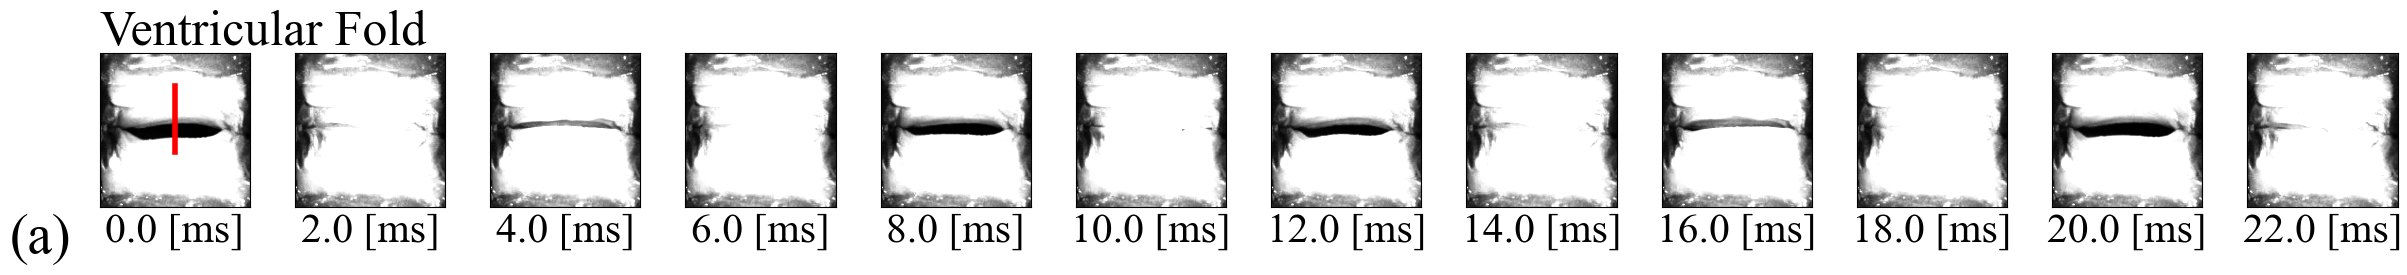

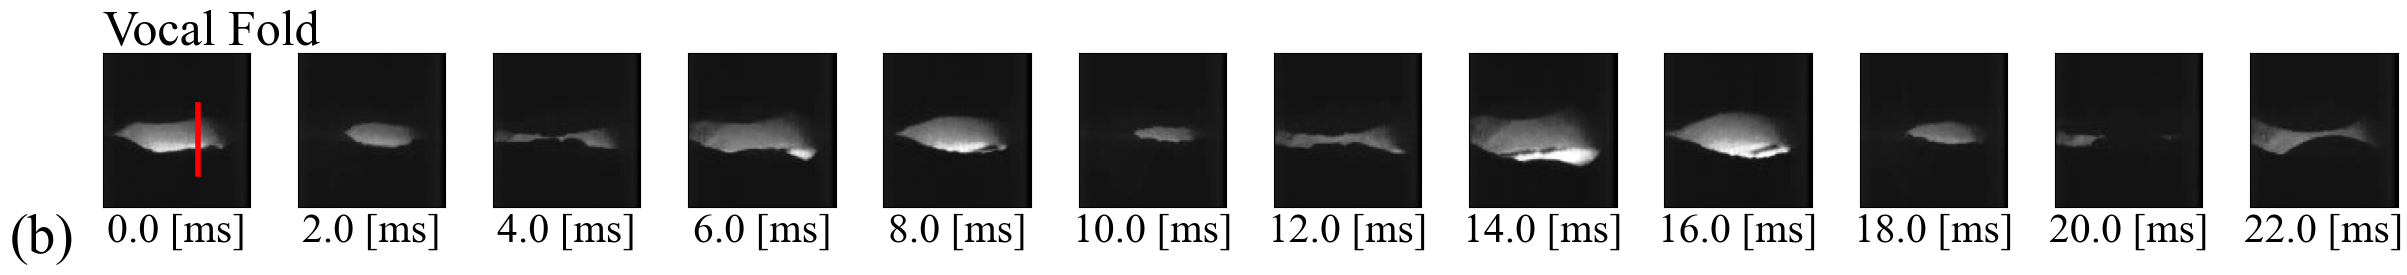

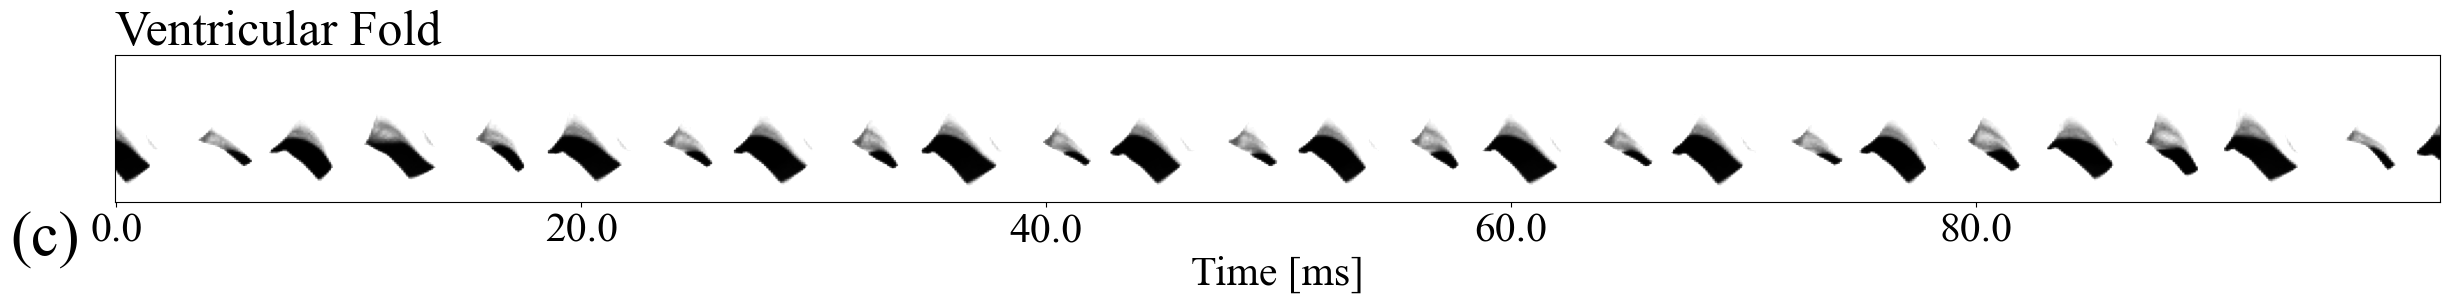

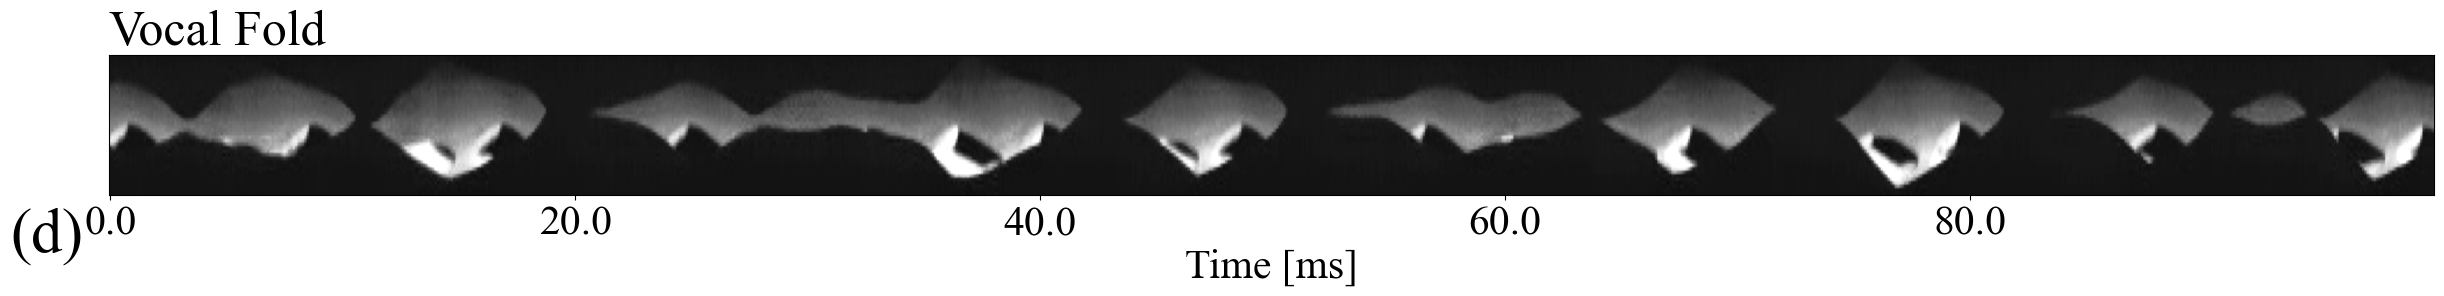

In [13]:
fig.figure04_snapshots(
                    data=video_fvf_data, t_data=video_fvf_t_data,position=[70, 80], width=70, c_line='r', lw_line=4, start=10, step=20, start_t_is_0=True,
                    title='Ventricular Fold',
                    figsize=(30, 2), n_shots=12, wspace=0.1, aspect=1.0,
                    gamma=0.3,
                    panel = '(a)', panel_xy=(0.08, 1.), panel_fontsize=40, 
                    save_filename='./results/figure/figure04-1.eps'
                    )

fig.figure04_snapshots(
                    data=video_vf_data, t_data=video_vf_t_data, position=[50, 40], width=40,  c_line='r', lw_line=4, start=10, step=20, start_t_is_0=True,
                    title='Vocal Fold',
                    figsize=(30, 2), n_shots=12, wspace=0.1, aspect=1.3,
                    gamma=0.7,
                    panel = '(b)', panel_xy=(0.08, 1.), panel_fontsize=40, 
                    save_filename='./results/figure/figure04-2.eps'
                    )

fig.figure04_linescannning(
                        data=video_fvf_data, t_data=video_fvf_t_data, position=[70, 80], width=70, 
                        start=10, n_frame=1000, start_t_is_0=True,
                        title='Ventricular Fold',
                        figsize=(30, 2), aspect=0.9,
                        gamma=0.3,
                        panel = '(c)', panel_xy=(0.81, 1.0), panel_fontsize=45, 
                        save_filename='./results/figure/figure04-3.eps'
                        )

fig.figure04_linescannning(
                        data=video_vf_data, t_data=video_vf_t_data, position=[50, 40], width=40, 
                        start=10, n_frame=1000, start_t_is_0=True,
                        title='Vocal Fold',
                        figsize=(30, 2), aspect=1.5,
                        gamma=0.7,
                        panel = '(d)', panel_xy=(0.808, 0.98), panel_fontsize=45, 
                        save_filename='./results/figure/figure04-4.eps'
                        )